In [8]:
import pandas as pd
import numpy as np

import os
dirpath = os.getcwd()
dirpath

'C:\\Users\\agupta\\Downloads\\Analytics vidhya\\WNS_hackathon'

In [9]:
train = pd.read_csv(dirpath + '/train_NA17Sgz/train.csv')
view_log = pd.read_csv(dirpath + '/train_NA17Sgz/view_log.csv')
item_data = pd.read_csv(dirpath + '/train_NA17Sgz/item_data.csv')

In [10]:
train['impression_time_new'] = pd.to_datetime(train.impression_time) 
train.head()

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click,impression_time_new
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,0,2018-11-15 00:00:00
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1,2018-11-15 00:01:00
2,70efdf2ec9b086079795c442636b55fb,2018-11-15 00:02:00,71748,259,intermediate,1,0,2018-11-15 00:02:00
3,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,69209,244,latest,1,0,2018-11-15 00:02:00
4,182be0c5cdcd5072bb1864cdee4d3d6e,2018-11-15 00:02:00,62873,473,latest,0,0,2018-11-15 00:02:00


In [11]:
train.is_click.sum()

10862

In [12]:
#train.CTR.describe()

In [13]:
train.user_id.value_counts().head()

71457    73
29947    70
59007    70
52082    67
68540    64
Name: user_id, dtype: int64

In [14]:
view_log['server_time_new'] = pd.to_datetime(view_log.server_time)
view_log.head()

,server_time,device_type,session_id,user_id,item_id,server_time_new
0,2018-10-15 08:58:00,android,112333,4557,32970,2018-10-15 08:58:00
1,2018-10-15 08:58:00,android,503590,74788,7640,2018-10-15 08:58:00
2,2018-10-15 08:58:00,android,573960,23628,128855,2018-10-15 08:58:00
3,2018-10-15 08:58:00,android,121691,2430,12774,2018-10-15 08:58:00
4,2018-10-15 08:58:00,android,218564,19227,28296,2018-10-15 08:58:00


In [15]:
view_log.shape

(3118622, 6)

In [16]:
train.dtypes

impression_id                  object
impression_time                object
user_id                         int64
app_code                        int64
os_version                     object
is_4G                           int64
is_click                        int64
impression_time_new    datetime64[ns]
dtype: object

In [17]:
view_log.user_id.nunique()

89157

In [18]:
item_data.head()

,item_id,item_price,category_1,category_2,category_3,product_type
0,26880,4602,11,35,20,3040
1,54939,3513,12,57,85,6822
2,40383,825,17,8,279,1619
3,8777,2355,13,58,189,5264
4,113705,1267,17,39,151,10239


# EDA of training data 

# Feature engineering for date time features

In [19]:
print(train.shape)
train.head()

(237609, 8)


,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click,impression_time_new
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,0,2018-11-15 00:00:00
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1,2018-11-15 00:01:00
2,70efdf2ec9b086079795c442636b55fb,2018-11-15 00:02:00,71748,259,intermediate,1,0,2018-11-15 00:02:00
3,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,69209,244,latest,1,0,2018-11-15 00:02:00
4,182be0c5cdcd5072bb1864cdee4d3d6e,2018-11-15 00:02:00,62873,473,latest,0,0,2018-11-15 00:02:00


In [20]:
train.is_click.value_counts()

0    226747
1     10862
Name: is_click, dtype: int64

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='is_click',data=train, palette='hls')
plt.show()

<Figure size 640x480 with 1 Axes>

In [22]:
(train.is_click.value_counts()/train.shape[0])*100

0    95.428624
1     4.571376
Name: is_click, dtype: float64

In [23]:
train['Hour'] = train.impression_time_new.dt.hour
train['Weekday'] = train.impression_time_new.dt.day_name()
train.head()

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click,impression_time_new,Hour,Weekday
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,0,2018-11-15 00:00:00,0,Thursday
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1,2018-11-15 00:01:00,0,Thursday
2,70efdf2ec9b086079795c442636b55fb,2018-11-15 00:02:00,71748,259,intermediate,1,0,2018-11-15 00:02:00,0,Thursday
3,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,69209,244,latest,1,0,2018-11-15 00:02:00,0,Thursday
4,182be0c5cdcd5072bb1864cdee4d3d6e,2018-11-15 00:02:00,62873,473,latest,0,0,2018-11-15 00:02:00,0,Thursday


In [24]:
train.impression_time_new.describe()

count                  237609
unique                  36461
top       2018-12-04 00:01:00
freq                       46
first     2018-11-15 00:00:00
last      2018-12-13 07:43:00
Name: impression_time_new, dtype: object

Text(0.5, 1.0, 'Number of clicks by hour')

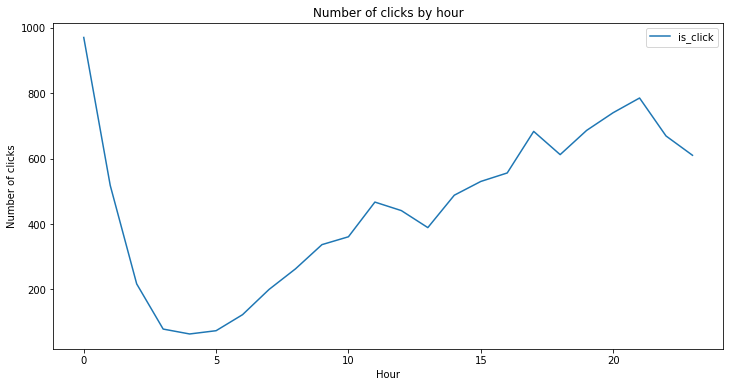

In [25]:
train.groupby('Hour').agg({'is_click':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('Number of clicks by hour') 

Text(0.5, 1.0, 'Number of clicks by day')

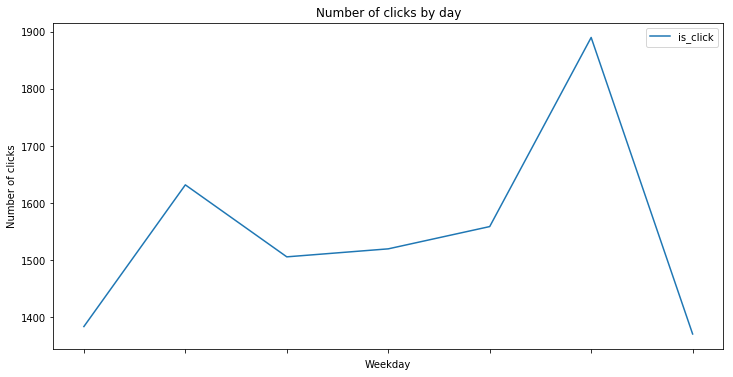

In [26]:
train.groupby('Weekday').agg({'is_click':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('Number of clicks by day')

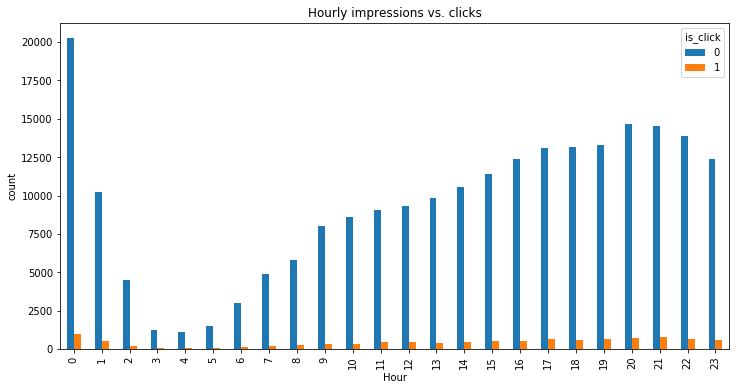

In [27]:
train.groupby(['Hour', 'is_click']).size().unstack().plot(kind='bar', title="Hour of Day", figsize=(12,6))
plt.ylabel('count')
plt.title('Hourly impressions vs. clicks');

Hourly CTR

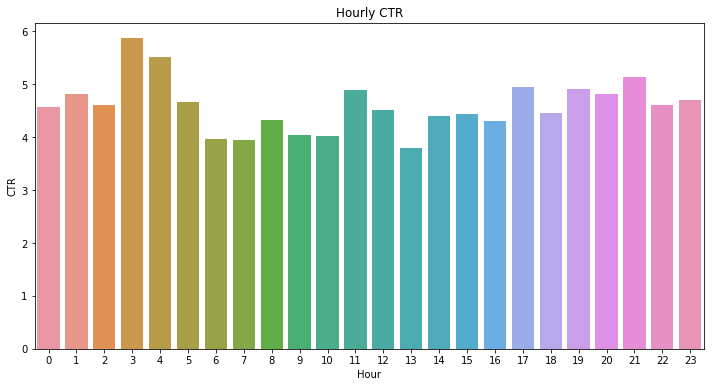

In [28]:
import seaborn as sns

df_click = train[train['is_click'] == 1]
df_hour = train[['Hour','is_click']].groupby(['Hour']).count().reset_index()
df_hour = df_hour.rename(columns={'is_click': 'impressions'})
df_hour['clicks'] = df_click[['Hour','is_click']].groupby(['Hour']).count().reset_index()['is_click']
df_hour['CTR'] = df_hour['clicks']/df_hour['impressions']*100

plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='Hour', data=df_hour)
plt.title('Hourly CTR');

Highest CTR happened at 3, 4 , 21, 17

In [29]:
train[['Hour','is_click']].groupby(['Hour']).count().reset_index()

,Hour,is_click
0,0,21211
1,1,10769
2,2,4703
3,3,1346
4,4,1159
5,5,1589
6,6,3098
7,7,5075
8,8,6088
9,9,8328


In [30]:
df_hour.sort_values('CTR', ascending = False)

,Hour,impressions,clicks,CTR
3,3,1346,79,5.869242
4,4,1159,64,5.522002
21,21,15297,785,5.131725
17,17,13794,683,4.951428
19,19,13992,686,4.902802
11,11,9553,467,4.888517
1,1,10769,518,4.810103
20,20,15386,740,4.809567
23,23,12978,610,4.700262
5,5,1589,74,4.657017


In [ ]:
df_hour

Day of week CTR

In [31]:
train.head()

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click,impression_time_new,Hour,Weekday
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,0,2018-11-15 00:00:00,0,Thursday
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1,2018-11-15 00:01:00,0,Thursday
2,70efdf2ec9b086079795c442636b55fb,2018-11-15 00:02:00,71748,259,intermediate,1,0,2018-11-15 00:02:00,0,Thursday
3,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,69209,244,latest,1,0,2018-11-15 00:02:00,0,Thursday
4,182be0c5cdcd5072bb1864cdee4d3d6e,2018-11-15 00:02:00,62873,473,latest,0,0,2018-11-15 00:02:00,0,Thursday


Text(0.5, 1.0, 'Day of week CTR')

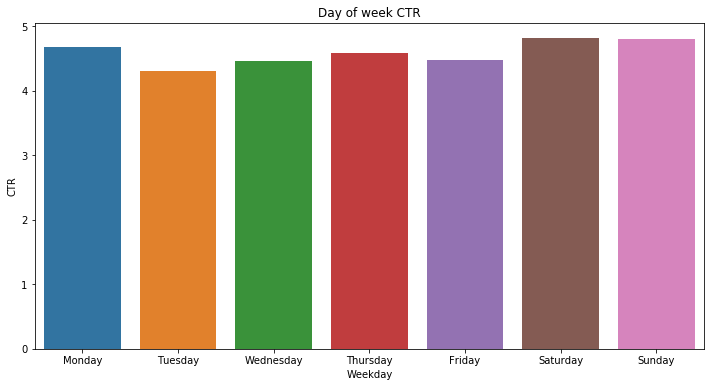

In [32]:
df_click = train[train['is_click'] == 1]
df_dayofweek = train[['Weekday','is_click']].groupby(['Weekday']).count().reset_index()
df_dayofweek = df_dayofweek.rename(columns={'is_click': 'impressions'})
df_dayofweek['clicks'] = df_click[['Weekday','is_click']].groupby(['Weekday']).count().reset_index()['is_click']
df_dayofweek['CTR'] = df_dayofweek['clicks']/df_dayofweek['impressions']*100

plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='Weekday', data=df_dayofweek, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Day of week CTR')

Highest CTR on Saturday and sunday, but not much difference at weekdays

In [33]:
df_dayofweek.sort_values('CTR', ascending = False)

,Weekday,impressions,clicks,CTR
2,Saturday,31306,1506,4.810579
3,Sunday,31682,1520,4.797677
1,Monday,34948,1632,4.669795
4,Thursday,33989,1559,4.586778
0,Friday,30941,1384,4.473029
6,Wednesday,30797,1371,4.451732
5,Tuesday,43946,1890,4.300733


App code CTR

In [34]:
print(train.app_code.nunique())
print((train.app_code.value_counts().head(200)/train.shape[0]).sum())
train.app_code.value_counts().head(200)

490
0.9927570083624779


207    33788
386    30706
190    17441
127    10851
371     9343
3       8860
296     7453
129     7050
385     6976
32      5984
5       5402
249     5181
469     5122
283     4622
244     4369
44      4346
242     3761
145     3607
213     2817
463     2463
359     2393
231     2348
465     2192
151     2176
318     2175
202     2123
508     1818
163     1596
38      1512
37      1437
       ...  
483       37
340       37
173       36
397       36
96        36
449       36
122       36
138       36
1         35
314       35
175       35
365       34
35        32
447       32
8         32
425       31
67        31
368       31
198       30
487       30
53        30
466       29
40        29
20        28
442       28
521       28
24        28
457       27
298       27
243       27
Name: app_code, Length: 200, dtype: int64

In [35]:
app_code_values = train.app_code.unique()
app_code_values.sort()
ctr_avg_list=[]

for i in app_code_values:
    ctr_avg=train.loc[np.where((train.app_code == i))].is_click.mean()
    ctr_avg_list.append(ctr_avg)
    print("for C1 value: {},  click through rate: {}".format(i,ctr_avg))

for C1 value: 0,  click through rate: 0.0821917808219178
for C1 value: 1,  click through rate: 0.08571428571428572
for C1 value: 2,  click through rate: 0.06716417910447761
for C1 value: 3,  click through rate: 0.034424379232505645
for C1 value: 4,  click through rate: 0.0
for C1 value: 5,  click through rate: 0.07330618289522399
for C1 value: 6,  click through rate: 0.0
for C1 value: 7,  click through rate: 0.058365758754863814
for C1 value: 8,  click through rate: 0.15625
for C1 value: 9,  click through rate: 0.0638002773925104
for C1 value: 12,  click through rate: 0.0
for C1 value: 13,  click through rate: 0.0
for C1 value: 14,  click through rate: 0.17525773195876287
for C1 value: 15,  click through rate: 0.0
for C1 value: 16,  click through rate: 0.11206896551724138
for C1 value: 17,  click through rate: 0.03278688524590164
for C1 value: 19,  click through rate: 0.08333333333333333
for C1 value: 20,  click through rate: 0.07142857142857142
for C1 value: 21,  click through rate: 0

for C1 value: 191,  click through rate: 0.0
for C1 value: 192,  click through rate: 0.0
for C1 value: 193,  click through rate: 0.016666666666666666
for C1 value: 194,  click through rate: 0.026845637583892617
for C1 value: 195,  click through rate: 0.1148936170212766
for C1 value: 196,  click through rate: 0.0
for C1 value: 197,  click through rate: 0.0
for C1 value: 198,  click through rate: 0.0
for C1 value: 199,  click through rate: 0.0
for C1 value: 200,  click through rate: 0.0
for C1 value: 201,  click through rate: 0.01818181818181818
for C1 value: 202,  click through rate: 0.04945831370701837
for C1 value: 203,  click through rate: 0.05
for C1 value: 204,  click through rate: 0.25
for C1 value: 205,  click through rate: 0.0
for C1 value: 206,  click through rate: 0.044444444444444446
for C1 value: 207,  click through rate: 0.014265419675624481
for C1 value: 208,  click through rate: 0.0
for C1 value: 209,  click through rate: 0.0
for C1 value: 210,  click through rate: 0.0
for

for C1 value: 406,  click through rate: 0.0
for C1 value: 407,  click through rate: 0.06537530266343826
for C1 value: 408,  click through rate: 1.0
for C1 value: 409,  click through rate: 0.051737451737451735
for C1 value: 410,  click through rate: 0.01293103448275862
for C1 value: 411,  click through rate: 0.08333333333333333
for C1 value: 412,  click through rate: 0.0
for C1 value: 414,  click through rate: 0.059006211180124224
for C1 value: 415,  click through rate: 0.014285714285714285
for C1 value: 416,  click through rate: 0.0
for C1 value: 417,  click through rate: 0.0
for C1 value: 418,  click through rate: 0.0
for C1 value: 419,  click through rate: 0.0
for C1 value: 420,  click through rate: 0.0
for C1 value: 421,  click through rate: 0.10508474576271186
for C1 value: 422,  click through rate: 0.1468354430379747
for C1 value: 423,  click through rate: 0.11158798283261803
for C1 value: 424,  click through rate: 0.1511627906976744
for C1 value: 425,  click through rate: 0.09677

In [36]:
train[train.app_code == 4]

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click,impression_time_new,Hour,Weekday
17302,27f2d2e6436617e42e2f251113eeb791,2018-11-19 21:38:00,6419,4,latest,0,0,2018-11-19 21:38:00,21,Monday
150704,645960dfbe61999875ab0aeb13ecebee,2018-12-04 18:25:00,6419,4,latest,0,0,2018-12-04 18:25:00,18,Tuesday


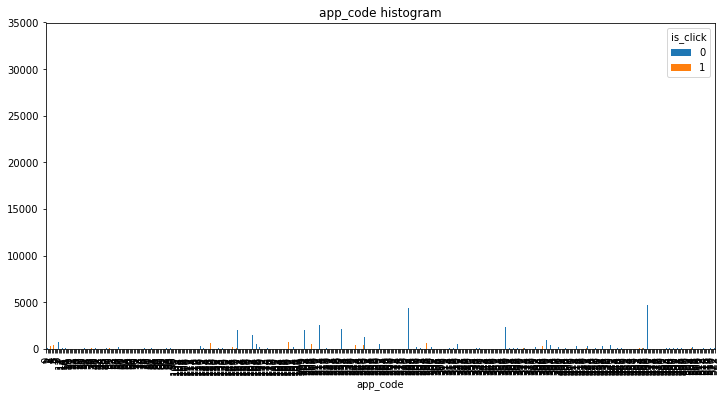

In [37]:
train.groupby(['app_code', 'is_click']).size().unstack().plot(kind='bar', figsize=(12,6), title='app_code histogram');

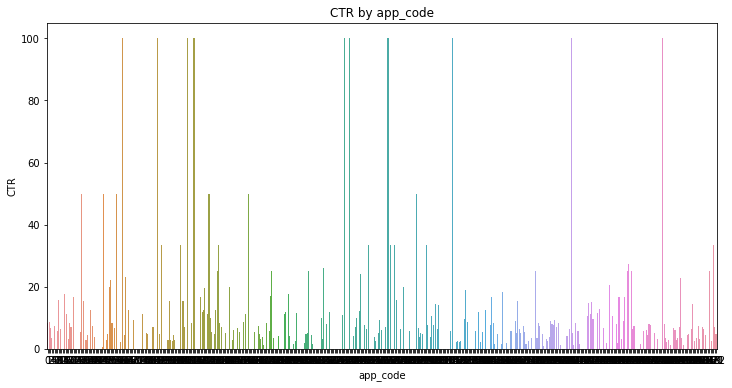

In [38]:
df_app_code = train[['app_code','is_click']].groupby(['app_code']).count().reset_index()
df_app_code = df_app_code.rename(columns={'is_click': 'impressions'})
df_app_code['clicks'] = train[['app_code','is_click']].groupby(['app_code']).sum().reset_index()['is_click']
df_app_code['CTR'] = df_app_code['clicks']/df_app_code['impressions']*100

plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='app_code', data=df_app_code)
plt.title('CTR by app_code');

In [39]:
df_app_code = train[['app_code','is_click']].groupby(['app_code']).count().reset_index()
df_app_code = df_app_code.rename(columns={'is_click': 'impressions'})
df_app_code['clicks'] = train[['app_code','is_click']].groupby(['app_code']).sum().reset_index()['is_click']
df_app_code['CTR'] = df_app_code['clicks']/df_app_code['impressions']*100

df_app_code.head()

,app_code,impressions,clicks,CTR
0,0,73,6,8.219178
1,1,35,3,8.571429
2,2,134,9,6.716418
3,3,8860,305,3.442438
4,4,2,0,0.000000


In [128]:
df_app_code.appcode_CTR.describe()

count    490.000000
mean       7.178318
std       15.859811
min        0.000000
25%        0.000000
50%        2.037408
75%        7.370634
max      100.000000
Name: appcode_CTR, dtype: float64

In [40]:
df_app_code[df_app_code.impressions >= 27].sort_values(['CTR', 'app_code'], ascending = False)

,app_code,impressions,clicks,CTR
202,215,27,7,25.925926
46,50,251,56,22.310757
411,438,111,23,20.720721
115,122,36,7,19.444444
12,14,97,17,17.525773
163,176,71,12,16.901408
422,449,36,6,16.666667
418,445,42,7,16.666667
8,8,32,5,15.625000
255,272,109,17,15.596330


os_version CTR

In [185]:
train.head()

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click,impression_time_new,Hour,Weekday,hour_CTR,weekday_CTR,appcode_CTR,osversion_CTR,is4G_CTR,userhour_CTR,userweek_CTR,user_CTR
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,0,2018-11-15 00:00:00,0,Thursday,4.573099,4.586778,14.683544,4.929044,4.625786,0.000000,0.0,0.000000
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1,2018-11-15 00:01:00,0,Thursday,4.573099,4.586778,6.161137,4.165119,4.475195,8.333333,12.5,9.615385
2,70efdf2ec9b086079795c442636b55fb,2018-11-15 00:02:00,71748,259,intermediate,1,0,2018-11-15 00:02:00,0,Thursday,4.573099,4.586778,4.982206,5.176170,4.475195,0.000000,0.0,0.000000
3,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,69209,244,latest,1,0,2018-11-15 00:02:00,0,Thursday,4.573099,4.586778,12.336919,4.165119,4.475195,0.000000,0.0,0.000000
4,182be0c5cdcd5072bb1864cdee4d3d6e,2018-11-15 00:02:00,62873,473,latest,0,0,2018-11-15 00:02:00,0,Thursday,4.573099,4.586778,5.020243,4.165119,4.625786,0.000000,0.0,0.000000


In [42]:
print(train.os_version.nunique())
train.os_version.value_counts()/train.shape[0]

3


latest          0.543818
intermediate    0.233758
old             0.222424
Name: os_version, dtype: float64

In [43]:
df_os_version = train[['os_version','is_click']].groupby(['os_version']).count().reset_index()
df_os_version = df_os_version.rename(columns={'is_click': 'impressions'})
df_os_version['clicks'] = train[['os_version','is_click']].groupby(['os_version']).sum().reset_index()['is_click']
df_os_version['CTR'] = df_os_version['clicks']/df_os_version['impressions']*100

df_os_version.head()

,os_version,impressions,clicks,CTR
0,intermediate,55543,2875,5.176170
1,latest,129216,5382,4.165119
2,old,52850,2605,4.929044


4G CTR

In [44]:
print(train.is_4G.nunique())
train.is_4G.value_counts()/train.shape[0]

2


0    0.638688
1    0.361312
Name: is_4G, dtype: float64

In [45]:
df_is_4G = train[['is_4G','is_click']].groupby(['is_4G']).count().reset_index()
df_is_4G = df_is_4G.rename(columns={'is_click': 'impressions'})
df_is_4G['clicks'] = train[['is_4G','is_click']].groupby(['is_4G']).sum().reset_index()['is_click']
df_is_4G['CTR'] = df_is_4G['clicks']/df_is_4G['impressions']*100

df_is_4G.head()

,is_4G,impressions,clicks,CTR
0,0,151758,7020,4.625786
1,1,85851,3842,4.475195


### user X time CTR features

In [62]:
train.head()

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click,impression_time_new,Hour,Weekday,hour_CTR,weekday_CTR,appcode_CTR,osversion_CTR,is4G_CTR
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,0,2018-11-15 00:00:00,0,Thursday,4.573099,4.586778,14.683544,4.929044,4.625786
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1,2018-11-15 00:01:00,0,Thursday,4.573099,4.586778,6.161137,4.165119,4.475195
2,70efdf2ec9b086079795c442636b55fb,2018-11-15 00:02:00,71748,259,intermediate,1,0,2018-11-15 00:02:00,0,Thursday,4.573099,4.586778,4.982206,5.176170,4.475195
3,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,69209,244,latest,1,0,2018-11-15 00:02:00,0,Thursday,4.573099,4.586778,12.336919,4.165119,4.475195
4,182be0c5cdcd5072bb1864cdee4d3d6e,2018-11-15 00:02:00,62873,473,latest,0,0,2018-11-15 00:02:00,0,Thursday,4.573099,4.586778,5.020243,4.165119,4.625786


In [68]:
# user X hour
df_user_hour = train[['user_id','Hour','is_click']].groupby(['user_id', 'Hour']).count().reset_index()
df_user_hour = df_user_hour.rename(columns={'is_click': 'impressions'})
df_user_hour['clicks'] = train[['user_id','Hour','is_click']].groupby(['user_id', 'Hour']).sum().reset_index()['is_click']
df_user_hour['userhour_CTR'] = df_user_hour['clicks']/df_user_hour['impressions']*100

df_user_hour.head()

,user_id,Hour,impressions,clicks,userhour_CTR
0,0,23,1,0,0.0
1,2,20,3,0,0.0
2,2,21,1,0,0.0
3,3,21,1,0,0.0
4,5,11,1,0,0.0


In [66]:
df_user_hour.sort_values('CTR', ascending = False).head()

,user_id,Hour,impressions,clicks,CTR
100113,55860,21,1,1,100.0
128470,71689,13,1,1,100.0
128422,71665,13,1,1,100.0
80126,44845,23,1,1,100.0
128416,71663,14,1,1,100.0


In [69]:
# user X Weekday
df_user_Weekday = train[['user_id','Weekday','is_click']].groupby(['user_id', 'Weekday']).count().reset_index()
df_user_Weekday = df_user_Weekday.rename(columns={'is_click': 'impressions'})
df_user_Weekday['clicks'] = train[['user_id','Weekday','is_click']].groupby(['user_id', 'Weekday']).sum().reset_index()['is_click']
df_user_Weekday['userweek_CTR'] = df_user_Weekday['clicks']/df_user_Weekday['impressions']*100

df_user_Weekday.head()


,user_id,Weekday,impressions,clicks,userweek_CTR
0,0,Monday,1,0,0.0
1,2,Monday,1,0,0.0
2,2,Tuesday,2,0,0.0
3,2,Wednesday,1,0,0.0
4,3,Wednesday,1,0,0.0


In [70]:
# user 
df_user = train[['user_id','is_click']].groupby(['user_id', ]).count().reset_index()
df_user = df_user.rename(columns={'is_click': 'impressions'})
df_user['clicks'] = train[['user_id','is_click']].groupby(['user_id', ]).sum().reset_index()['is_click']
df_user['user_CTR'] = df_user['clicks']/df_user['impressions']*100

df_user.head()

,user_id,impressions,clicks,user_CTR
0,0,1,0,0.0
1,2,4,0,0.0
2,3,1,0,0.0
3,5,2,0,0.0
4,6,1,0,0.0


## features from view log data

In [183]:
key_cols = ['user_id', 'impression_id']
print('Appending train and test data')


Appending train and test data


In [ ]:
df_train_test = 

In [184]:
train.head()

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click,impression_time_new,Hour,Weekday,hour_CTR,weekday_CTR,appcode_CTR,osversion_CTR,is4G_CTR,userhour_CTR,userweek_CTR,user_CTR
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,0,2018-11-15 00:00:00,0,Thursday,4.573099,4.586778,14.683544,4.929044,4.625786,0.000000,0.0,0.000000
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1,2018-11-15 00:01:00,0,Thursday,4.573099,4.586778,6.161137,4.165119,4.475195,8.333333,12.5,9.615385
2,70efdf2ec9b086079795c442636b55fb,2018-11-15 00:02:00,71748,259,intermediate,1,0,2018-11-15 00:02:00,0,Thursday,4.573099,4.586778,4.982206,5.176170,4.475195,0.000000,0.0,0.000000
3,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,69209,244,latest,1,0,2018-11-15 00:02:00,0,Thursday,4.573099,4.586778,12.336919,4.165119,4.475195,0.000000,0.0,0.000000
4,182be0c5cdcd5072bb1864cdee4d3d6e,2018-11-15 00:02:00,62873,473,latest,0,0,2018-11-15 00:02:00,0,Thursday,4.573099,4.586778,5.020243,4.165119,4.625786,0.000000,0.0,0.000000


# Model training 

1. df_hour
2. df_dayofweek
3. df_app_code
4. df_os_version
5. df_is_4G

In [46]:
df_hour.rename(columns = {'CTR': 'hour_CTR'}, inplace = True)
df_dayofweek.rename(columns = {'CTR': 'weekday_CTR'}, inplace = True)
df_app_code.rename(columns = {'CTR': 'appcode_CTR'}, inplace = True)
df_os_version.rename(columns = {'CTR': 'osversion_CTR'}, inplace = True)
df_is_4G.rename(columns = {'CTR': 'is4G_CTR'}, inplace = True)

In [47]:
train = pd.merge(train, df_hour[['Hour', 'hour_CTR']], on = 'Hour', how = 'left')
train = pd.merge(train, df_dayofweek[['Weekday', 'weekday_CTR']], on = 'Weekday', how = 'left')
train = pd.merge(train, df_app_code[['app_code', 'appcode_CTR']], on = 'app_code', how = 'left')
train = pd.merge(train, df_os_version[['os_version', 'osversion_CTR']], on = 'os_version', how = 'left')
train = pd.merge(train, df_is_4G[['is_4G', 'is4G_CTR']], on = 'is_4G', how = 'left')

In [83]:
#adding more features(user X time features)
train = pd.merge(train, df_user_hour[['user_id', 'Hour', 'userhour_CTR']], on = ['user_id', 'Hour'], how = 'left')
train = pd.merge(train, df_user_Weekday[['user_id', 'Weekday', 'userweek_CTR']], on = ['user_id', 'Weekday'], how = 'left')
train = pd.merge(train, df_user[['user_id', 'user_CTR']], on = 'user_id', how = 'left')


In [84]:
print(train.columns)
train.head()

Index(['impression_id', 'impression_time', 'user_id', 'app_code', 'os_version',
       'is_4G', 'is_click', 'impression_time_new', 'Hour', 'Weekday',
       'hour_CTR', 'weekday_CTR', 'appcode_CTR', 'osversion_CTR', 'is4G_CTR',
       'userhour_CTR', 'userweek_CTR', 'user_CTR'],
      dtype='object')


,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click,impression_time_new,Hour,Weekday,hour_CTR,weekday_CTR,appcode_CTR,osversion_CTR,is4G_CTR,userhour_CTR,userweek_CTR,user_CTR
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,0,2018-11-15 00:00:00,0,Thursday,4.573099,4.586778,14.683544,4.929044,4.625786,0.000000,0.0,0.000000
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1,2018-11-15 00:01:00,0,Thursday,4.573099,4.586778,6.161137,4.165119,4.475195,8.333333,12.5,9.615385
2,70efdf2ec9b086079795c442636b55fb,2018-11-15 00:02:00,71748,259,intermediate,1,0,2018-11-15 00:02:00,0,Thursday,4.573099,4.586778,4.982206,5.176170,4.475195,0.000000,0.0,0.000000
3,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,69209,244,latest,1,0,2018-11-15 00:02:00,0,Thursday,4.573099,4.586778,12.336919,4.165119,4.475195,0.000000,0.0,0.000000
4,182be0c5cdcd5072bb1864cdee4d3d6e,2018-11-15 00:02:00,62873,473,latest,0,0,2018-11-15 00:02:00,0,Thursday,4.573099,4.586778,5.020243,4.165119,4.625786,0.000000,0.0,0.000000


In [131]:
model_features = ['hour_CTR', 'weekday_CTR', 'appcode_CTR', 'osversion_CTR','is4G_CTR']
X_train = train[model_features]
Y_train = train[['is_click']]

In [132]:
print(train.shape)
print(X_train.shape)
print(Y_train.shape)
X_train.head()

(237609, 18)
(237609, 5)
(237609, 1)


,hour_CTR,weekday_CTR,appcode_CTR,osversion_CTR,is4G_CTR
0,4.573099,4.586778,14.683544,4.929044,4.625786
1,4.573099,4.586778,6.161137,4.165119,4.475195
2,4.573099,4.586778,4.982206,5.176170,4.475195
3,4.573099,4.586778,12.336919,4.165119,4.475195
4,4.573099,4.586778,5.020243,4.165119,4.625786


In [85]:
model_features = ['hour_CTR', 'weekday_CTR', 'appcode_CTR', 'osversion_CTR','is4G_CTR', 'userhour_CTR', 'userweek_CTR', 'user_CTR']
X_train = train[model_features]
Y_train = train[['is_click']]

In [86]:
print(train.shape)
print(X_train.shape)
print(Y_train.shape)
X_train.head()

(237609, 18)
(237609, 8)
(237609, 1)


,hour_CTR,weekday_CTR,appcode_CTR,osversion_CTR,is4G_CTR,userhour_CTR,userweek_CTR,user_CTR
0,4.573099,4.586778,14.683544,4.929044,4.625786,0.000000,0.0,0.000000
1,4.573099,4.586778,6.161137,4.165119,4.475195,8.333333,12.5,9.615385
2,4.573099,4.586778,4.982206,5.176170,4.475195,0.000000,0.0,0.000000
3,4.573099,4.586778,12.336919,4.165119,4.475195,0.000000,0.0,0.000000
4,4.573099,4.586778,5.020243,4.165119,4.625786,0.000000,0.0,0.000000


# Model : Gradient Boosting

In [143]:
#!pip install xgboost

In [89]:
import sklearn
# import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
x_train, x_valid, y_train, y_valid = train_test_split(
    X_train,
    Y_train,
    stratify=Y_train,
    test_size=0.1,
    random_state=42)

In [52]:
print(x_train.shape)
x_train.head()

(213848, 5)


,hour_CTR,weekday_CTR,appcode_CTR,osversion_CTR,is4G_CTR
86856,4.573099,4.586778,4.751773,4.929044,4.625786
126626,4.046590,4.810579,7.353099,5.176170,4.625786
53855,5.131725,4.300733,1.542834,4.929044,4.625786
236485,4.405525,4.451732,1.426542,5.176170,4.625786
210738,4.809567,4.586778,7.701597,5.176170,4.625786


In [154]:
model = XGBClassifier()
xgb_clf = model

In [155]:
xgb_clf.fit(x_train, y_train, early_stopping_rounds=10,
            eval_metric="logloss", eval_set=[(x_valid, y_valid)])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-logloss:0.61433
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.549847
[2]	validation_0-logloss:0.496337
[3]	validation_0-logloss:0.451366
[4]	validation_0-logloss:0.413318
[5]	validation_0-logloss:0.380904
[6]	validation_0-logloss:0.353125
[7]	validation_0-logloss:0.329135
[8]	validation_0-logloss:0.308452
[9]	validation_0-logloss:0.290608
[10]	validation_0-logloss:0.275047
[11]	validation_0-logloss:0.261583
[12]	validation_0-logloss:0.249873
[13]	validation_0-logloss:0.239678
[14]	validation_0-logloss:0.230806
[15]	validation_0-logloss:0.223113
[16]	validation_0-logloss:0.216381
[17]	validation_0-logloss:0.21053
[18]	validation_0-logloss:0.205436
[19]	validation_0-logloss:0.201013
[20]	validation_0-logloss:0.197174
[21]	validation_0-logloss:0.193841
[22]	validation_0-logloss:0.190961
[23]	validation_0-logloss:0.188452
[24]	validation_0-logloss:0.186285
[25]	validation_0-logloss:0.184405
[26]	validation_0-logloss:0.182776

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [184]:
y_pred = xgb_clf.predict_proba(x_valid)[:,1]
y_pred_bin = xgb_clf.predict(x_valid)
predictions_bin = [round(value) for value in y_pred_bin]
predictions = y_pred

In [199]:
from sklearn import metrics

print(metrics.accuracy_score(y_valid, predictions_bin))
print(metrics.confusion_matrix(y_valid, predictions_bin))
print(metrics.roc_auc_score(y_valid, predictions))

0.954336938681032
[[22675     0]
 [ 1085     1]]
0.7089907025569491


# Parameter tuning

In [202]:
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

xgb1.fit(x_train, y_train, early_stopping_rounds=10,
            eval_metric="auc", eval_set=[(x_valid, y_valid)])



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-auc:0.699338
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.705472
[2]	validation_0-auc:0.705517
[3]	validation_0-auc:0.70652
[4]	validation_0-auc:0.706405
[5]	validation_0-auc:0.707047
[6]	validation_0-auc:0.707637
[7]	validation_0-auc:0.708733
[8]	validation_0-auc:0.709383
[9]	validation_0-auc:0.709364
[10]	validation_0-auc:0.709039
[11]	validation_0-auc:0.709827
[12]	validation_0-auc:0.710293
[13]	validation_0-auc:0.710175
[14]	validation_0-auc:0.710013
[15]	validation_0-auc:0.709969
[16]	validation_0-auc:0.710248
[17]	validation_0-auc:0.710351
[18]	validation_0-auc:0.710364
[19]	validation_0-auc:0.710562
[20]	validation_0-auc:0.71041
[21]	validation_0-auc:0.710115
[22]	validation_0-auc:0.710013
[23]	validation_0-auc:0.709871
[24]	validation_0-auc:0.7095
[25]	validation_0-auc:0.709245
[26]	validation_0-auc:0.709214
[27]	validation_0-auc:0.709201
[28]	validation_0-auc:0.709351
[29]	validation_0-auc:0.709377
Stopping. Best itera

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
       nthread=4, objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=27, silent=None,
       subsample=0.8, verbosity=1)

In [203]:
print(metrics.accuracy_score(y_valid, predictions_bin))
print(metrics.confusion_matrix(y_valid, predictions_bin))
print(metrics.roc_auc_score(y_valid, predictions))

0.954336938681032
[[22675     0]
 [ 1085     1]]
0.7089907025569491


In [211]:
from sklearn.model_selection import GridSearchCV

param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch1.fit(x_train,y_train)
#gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=140, n_jobs=1,
       nthread=4, objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=27, silent=None,
       subsample=0.8, verbosity=1),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'max_depth': range(3, 10, 2), 'min_child_weight': range(1, 6, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [217]:
gsearch1.best_estimator_, gsearch1.best_params_,gsearch1.best_score_

(XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
        colsample_bynode=1, colsample_bytree=0.8, gamma=0,
        learning_rate=0.1, max_delta_step=0, max_depth=3,
        min_child_weight=3, missing=None, n_estimators=140, n_jobs=1,
        nthread=4, objective='binary:logistic', random_state=0, reg_alpha=0,
        reg_lambda=1, scale_pos_weight=1, seed=27, silent=None,
        subsample=0.8, verbosity=1),
 {'max_depth': 3, 'min_child_weight': 3},
 0.7015570813493752)

In [232]:
gsearch1.cv_results_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\util

{'mean_fit_time': array([11.35566998, 13.50300517, 14.08804135, 19.60262489, 19.39788342,
        19.57460351, 25.2957171 , 25.07360792, 25.42013507, 33.18622608,
        32.24214592, 28.62295985]),
 'std_fit_time': array([0.66926057, 0.68734208, 0.2426614 , 0.39800717, 0.12820153,
        0.29436037, 0.36787707, 0.29019844, 0.65188365, 0.74050005,
        0.30854725, 2.51578109]),
 'mean_score_time': array([0.10591745, 0.11648846, 0.12366962, 0.18331051, 0.17373614,
        0.17912259, 0.29800415, 0.24654078, 0.26190033, 0.33729968,
        0.31336226, 0.28723388]),
 'std_score_time': array([0.03033856, 0.01489223, 0.01496605, 0.0302467 , 0.00849578,
        0.02684749, 0.06057829, 0.01320685, 0.03052982, 0.01319187,
        0.00955316, 0.04142451]),
 'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
             

In [227]:
param_test2 = {
 'max_depth':[2,3,4],
 'min_child_weight':[2,3,4]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5, return_train_score=True)

gsearch2.fit(x_train,y_train)

gsearch2.best_estimator_, gsearch2.best_params_,gsearch2.best_score_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
        colsample_bynode=1, colsample_bytree=0.8, gamma=0,
        learning_rate=0.1, max_delta_step=0, max_depth=2,
        min_child_weight=3, missing=None, n_estimators=140, n_jobs=1,
        nthread=4, objective='binary:logistic', random_state=0, reg_alpha=0,
        reg_lambda=1, scale_pos_weight=1, seed=27, silent=None,
        subsample=0.8, verbosity=1),
 {'max_depth': 2, 'min_child_weight': 3},
 0.7020316390357939)

In [230]:
gsearch2.cv_results_

{'mean_fit_time': array([ 9.7956264 , 10.51191201,  9.9675684 , 11.89621544, 12.69214439,
        13.02878904, 16.02997088, 16.57431712, 15.69965429]),
 'std_fit_time': array([0.33739031, 0.23787369, 0.16805735, 0.13303031, 0.44945049,
        0.46049912, 0.80656682, 0.50230841, 3.25222286]),
 'mean_score_time': array([0.09182339, 0.09514651, 0.08118281, 0.09873581, 0.11210103,
        0.11070414, 0.13842931, 0.13623548, 0.12686024]),
 'std_score_time': array([0.02831403, 0.01560052, 0.0068113 , 0.01671258, 0.01452973,
        0.02122239, 0.02216194, 0.01058508, 0.02126357]),
 'param_max_depth': masked_array(data=[2, 2, 2, 3, 3, 3, 4, 4, 4],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_min_child_weight': masked_array(data=[2, 3, 4, 2, 3, 4, 2, 3, 4],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_val

1. max_depth: 2 
2. min_child_weight: 3

In [239]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}

#gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=2,
 #min_child_weight=3, gamma=0, subsample=0.8, colsample_bytree=0.8,
 #objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 #param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5, return_train_score= True)

#gsearch3.fit(x_train,y_train)

gsearch3.best_estimator_, gsearch3.best_params_,gsearch3.best_score_

(XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
        colsample_bynode=1, colsample_bytree=0.8, gamma=0.3,
        learning_rate=0.1, max_delta_step=0, max_depth=2,
        min_child_weight=3, missing=None, n_estimators=140, n_jobs=1,
        nthread=4, objective='binary:logistic', random_state=0, reg_alpha=0,
        reg_lambda=1, scale_pos_weight=1, seed=27, silent=None,
        subsample=0.8, verbosity=1), {'gamma': 0.3}, 0.7020343323095151)

gamma = 0.3

In [241]:
param_test6 = {
 'reg_alpha':[0, 1e-2, 0.005, 0.01, 0.1, 1]
}

gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=2,
 min_child_weight=3, gamma=0.3, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5, return_train_score=True)


gsearch6.fit(x_train,y_train)

gsearch6.best_estimator_, gsearch6.best_params_,gsearch6.best_score_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
        colsample_bynode=1, colsample_bytree=0.8, gamma=0.3,
        learning_rate=0.1, max_delta_step=0, max_depth=2,
        min_child_weight=3, missing=None, n_estimators=177, n_jobs=1,
        nthread=4, objective='binary:logistic', random_state=0,
        reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1, seed=27,
        silent=None, subsample=0.8, verbosity=1),
 {'reg_alpha': 0.1},
 0.7017646215093116)

Final parameters
1. max_depth: 2
2. min_child_weight: 3
3. gamma = 0.3
4. reg_alpha = 0.1
5. learning_rate = 0.01

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train,
    y_train,
    stratify=y_train,
    test_size=0.1,
    random_state=42)

In [243]:
train.head()

,impression_id,impression_time,user_id,app_code,os_version,is_4G
0,a9e7126a585a69a32bc7414e9d0c0ada,2018-12-13 07:44:00,44754,127,latest,1
1,caac14a5bf2ba283db7708bb34855760,2018-12-13 07:45:00,29656,44,latest,0
2,13f10ba306a19ce7bec2f3cae507b698,2018-12-13 07:46:00,25234,296,latest,1
3,39c4b4dc0e9701b55a0a4f072008fb3f,2018-12-13 07:47:00,22988,207,latest,1
4,bf5a572cca75f5fc67f4b14e58b11d70,2018-12-13 07:48:00,35431,242,latest,1


In [289]:
xgb2 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=2,
 min_child_weight=3,
 gamma=0.3,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.1,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)


xgb2.fit(X_train, Y_train, early_stopping_rounds=10,
            eval_metric="auc", eval_set=[(x_valid, y_valid)])

[0]	validation_0-auc:0.695407


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.69909
[2]	validation_0-auc:0.703402
[3]	validation_0-auc:0.702949
[4]	validation_0-auc:0.703276
[5]	validation_0-auc:0.705113
[6]	validation_0-auc:0.706664
[7]	validation_0-auc:0.706711
[8]	validation_0-auc:0.706456
[9]	validation_0-auc:0.70636
[10]	validation_0-auc:0.706515
[11]	validation_0-auc:0.706264
[12]	validation_0-auc:0.70668
[13]	validation_0-auc:0.706203
[14]	validation_0-auc:0.706351
[15]	validation_0-auc:0.707157
[16]	validation_0-auc:0.706721
[17]	validation_0-auc:0.706742
[18]	validation_0-auc:0.707263
[19]	validation_0-auc:0.707076
[20]	validation_0-auc:0.70728
[21]	validation_0-auc:0.707215
[22]	validation_0-auc:0.707249
[23]	validation_0-auc:0.707546
[24]	validation_0-auc:0.707604
[25]	validation_0-auc:0.707488
[26]	validation_0-auc:0.707647
[27]	validation_0-auc:0.707802
[28]	validation_0-auc:0.707787
[29]	validation_0-auc:0.707795
[30]	validation_0-auc:0.70766
[31]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8, gamma=0.3,
       learning_rate=0.01, max_delta_step=0, max_depth=2,
       min_child_weight=3, missing=None, n_estimators=5000, n_jobs=1,
       nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1, seed=27,
       silent=None, subsample=0.8, verbosity=1)

### runing the model with extra features

In [91]:

x_train, x_valid, y_train, y_valid = train_test_split(
    X_train,
    Y_train,
    stratify=Y_train,
    test_size=0.1,
    random_state=42)
print(x_train.shape)
x_train.head()

(213848, 8)


,hour_CTR,weekday_CTR,appcode_CTR,osversion_CTR,is4G_CTR,userhour_CTR,userweek_CTR,user_CTR
86856,4.573099,4.586778,4.751773,4.929044,4.625786,0.0,0.0,7.142857
126626,4.046590,4.810579,7.353099,5.176170,4.625786,0.0,0.0,0.000000
53855,5.131725,4.300733,1.542834,4.929044,4.625786,0.0,0.0,0.000000
236485,4.405525,4.451732,1.426542,5.176170,4.625786,0.0,0.0,0.000000
210738,4.809567,4.586778,7.701597,5.176170,4.625786,0.0,0.0,0.000000


In [110]:
xgb2 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=2,
 min_child_weight=3,
 gamma=0.3,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.1,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)


xgb2.fit(X_train, Y_train, early_stopping_rounds=50,
            eval_metric="auc", eval_set=[(x_valid, y_valid)])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-auc:0.987087
Will train until validation_0-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.995216
[2]	validation_0-auc:0.995903
[3]	validation_0-auc:0.995957
[4]	validation_0-auc:0.995928
[5]	validation_0-auc:0.995581
[6]	validation_0-auc:0.995536
[7]	validation_0-auc:0.995936
[8]	validation_0-auc:0.995922
[9]	validation_0-auc:0.995871
[10]	validation_0-auc:0.995939
[11]	validation_0-auc:0.995913
[12]	validation_0-auc:0.995916
[13]	validation_0-auc:0.995898
[14]	validation_0-auc:0.995741
[15]	validation_0-auc:0.995892
[16]	validation_0-auc:0.995987
[17]	validation_0-auc:0.996192
[18]	validation_0-auc:0.99608
[19]	validation_0-auc:0.996059
[20]	validation_0-auc:0.996016
[21]	validation_0-auc:0.996052
[22]	validation_0-auc:0.996024
[23]	validation_0-auc:0.99605
[24]	validation_0-auc:0.996056
[25]	validation_0-auc:0.996052
[26]	validation_0-auc:0.996125
[27]	validation_0-auc:0.996137
[28]	validation_0-auc:0.99612
[29]	validation_0-auc:0.996174
[30]	validation_0-a

[259]	validation_0-auc:0.997072
[260]	validation_0-auc:0.997072
[261]	validation_0-auc:0.997072
[262]	validation_0-auc:0.997073
[263]	validation_0-auc:0.997073
[264]	validation_0-auc:0.997073
[265]	validation_0-auc:0.997073
[266]	validation_0-auc:0.997073
[267]	validation_0-auc:0.997073
[268]	validation_0-auc:0.997073
[269]	validation_0-auc:0.997073
[270]	validation_0-auc:0.997073
[271]	validation_0-auc:0.997074
[272]	validation_0-auc:0.997074
[273]	validation_0-auc:0.997074
[274]	validation_0-auc:0.997078
[275]	validation_0-auc:0.997078
[276]	validation_0-auc:0.997078
[277]	validation_0-auc:0.997078
[278]	validation_0-auc:0.997078
[279]	validation_0-auc:0.997078
[280]	validation_0-auc:0.997078
[281]	validation_0-auc:0.997078
[282]	validation_0-auc:0.997078
[283]	validation_0-auc:0.997078
[284]	validation_0-auc:0.997079
[285]	validation_0-auc:0.997079
[286]	validation_0-auc:0.997079
[287]	validation_0-auc:0.997079
[288]	validation_0-auc:0.997079
[289]	validation_0-auc:0.997079
[290]	va

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8, gamma=0.3,
       learning_rate=0.01, max_delta_step=0, max_depth=2,
       min_child_weight=3, missing=None, n_estimators=5000, n_jobs=1,
       nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1, seed=27,
       silent=None, subsample=0.8, verbosity=1)

In [96]:
y_pred = xgb2.predict_proba(x_valid)[:,1]
y_pred_bin = xgb2.predict(x_valid)
predictions_bin = [round(value) for value in y_pred_bin]
predictions = y_pred

In [97]:
from sklearn import metrics

print(metrics.accuracy_score(y_valid, predictions_bin))
print(metrics.confusion_matrix(y_valid, predictions_bin))
print(metrics.roc_auc_score(y_valid, predictions))

0.9853120659904886
[[22444   231]
 [  118   968]]
0.9970716404636742


logistic regression

In [164]:

x_train, x_valid, y_train, y_valid = train_test_split(
    X_train,
    Y_train,
    stratify=Y_train,
    test_size=0.3,
    random_state=42)
print(x_train.shape)
x_train.head()

(166326, 5)


,hour_CTR,weekday_CTR,appcode_CTR,osversion_CTR,is4G_CTR
72307,4.809567,4.451732,7.353099,4.929044,4.475195
237203,4.451233,4.451732,4.845183,5.176170,4.625786
169091,4.809567,4.451732,5.317482,4.165119,4.625786
119132,4.657017,4.451732,1.426542,4.929044,4.475195
133226,4.810103,4.797677,0.807660,4.165119,4.475195


In [146]:
print(x_train.shape)
print(x_test.shape)

(166326, 5)
(71283, 5)


In [161]:
lr_classify = LogisticRegression(class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=500, n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [162]:
lr_classify.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=500,
          multi_class='warn', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [166]:
y_pred = lr_classify.predict_proba(x_valid)[:,1]
y_pred_bin = lr_classify.predict(x_valid)
predictions_bin = [round(value) for value in y_pred_bin]
predictions = y_pred

from sklearn import metrics

print(metrics.accuracy_score(y_valid, predictions_bin))
print(metrics.confusion_matrix(y_valid, predictions_bin))
print(metrics.roc_auc_score(y_valid, predictions))

0.670819129385688
[[45846 22178]
 [ 1287  1972]]
0.7032733911901642


# Predictions on test data 

In [167]:
test = pd.read_csv(dirpath + '/test_aq1FGdB/test.csv')

In [168]:
test.head()

,impression_id,impression_time,user_id,app_code,os_version,is_4G
0,a9e7126a585a69a32bc7414e9d0c0ada,2018-12-13 07:44:00,44754,127,latest,1
1,caac14a5bf2ba283db7708bb34855760,2018-12-13 07:45:00,29656,44,latest,0
2,13f10ba306a19ce7bec2f3cae507b698,2018-12-13 07:46:00,25234,296,latest,1
3,39c4b4dc0e9701b55a0a4f072008fb3f,2018-12-13 07:47:00,22988,207,latest,1
4,bf5a572cca75f5fc67f4b14e58b11d70,2018-12-13 07:48:00,35431,242,latest,1


In [169]:
test['impression_time_new'] = pd.to_datetime(test.impression_time) 
test['Hour'] = test.impression_time_new.dt.hour
test['Weekday'] = test.impression_time_new.dt.day_name()
test.head()

,impression_id,impression_time,user_id,app_code,os_version,is_4G,impression_time_new,Hour,Weekday
0,a9e7126a585a69a32bc7414e9d0c0ada,2018-12-13 07:44:00,44754,127,latest,1,2018-12-13 07:44:00,7,Thursday
1,caac14a5bf2ba283db7708bb34855760,2018-12-13 07:45:00,29656,44,latest,0,2018-12-13 07:45:00,7,Thursday
2,13f10ba306a19ce7bec2f3cae507b698,2018-12-13 07:46:00,25234,296,latest,1,2018-12-13 07:46:00,7,Thursday
3,39c4b4dc0e9701b55a0a4f072008fb3f,2018-12-13 07:47:00,22988,207,latest,1,2018-12-13 07:47:00,7,Thursday
4,bf5a572cca75f5fc67f4b14e58b11d70,2018-12-13 07:48:00,35431,242,latest,1,2018-12-13 07:48:00,7,Thursday


In [170]:
test = pd.merge(test, df_hour[['Hour', 'hour_CTR']], on = 'Hour', how = 'left')
test = pd.merge(test, df_dayofweek[['Weekday', 'weekday_CTR']], on = 'Weekday', how = 'left')
test = pd.merge(test, df_app_code[['app_code', 'appcode_CTR']], on = 'app_code', how = 'left')
test = pd.merge(test, df_os_version[['os_version', 'osversion_CTR']], on = 'os_version', how = 'left')
test = pd.merge(test, df_is_4G[['is_4G', 'is4G_CTR']], on = 'is_4G', how = 'left')

In [103]:
# adding extra features
#adding more features(user X time features)
test = pd.merge(test, df_user_hour[['user_id', 'Hour', 'userhour_CTR']], on = ['user_id', 'Hour'], how = 'left')
test = pd.merge(test, df_user_Weekday[['user_id', 'Weekday', 'userweek_CTR']], on = ['user_id', 'Weekday'], how = 'left')
test = pd.merge(test, df_user[['user_id', 'user_CTR']], on = 'user_id', how = 'left')


In [171]:
print(test.shape)
test.head()

(90675, 14)


,impression_id,impression_time,user_id,app_code,os_version,is_4G,impression_time_new,Hour,Weekday,hour_CTR,weekday_CTR,appcode_CTR,osversion_CTR,is4G_CTR
0,a9e7126a585a69a32bc7414e9d0c0ada,2018-12-13 07:44:00,44754,127,latest,1,2018-12-13 07:44:00,7,Thursday,3.940887,4.586778,5.317482,4.165119,4.475195
1,caac14a5bf2ba283db7708bb34855760,2018-12-13 07:45:00,29656,44,latest,0,2018-12-13 07:45:00,7,Thursday,3.940887,4.586778,0.621261,4.165119,4.625786
2,13f10ba306a19ce7bec2f3cae507b698,2018-12-13 07:46:00,25234,296,latest,1,2018-12-13 07:46:00,7,Thursday,3.940887,4.586778,7.701597,4.165119,4.475195
3,39c4b4dc0e9701b55a0a4f072008fb3f,2018-12-13 07:47:00,22988,207,latest,1,2018-12-13 07:47:00,7,Thursday,3.940887,4.586778,1.426542,4.165119,4.475195
4,bf5a572cca75f5fc67f4b14e58b11d70,2018-12-13 07:48:00,35431,242,latest,1,2018-12-13 07:48:00,7,Thursday,3.940887,4.586778,9.864398,4.165119,4.475195


In [172]:
x_test = test[model_features]

In [173]:
print(x_test.shape)
x_test.head()

(90675, 5)


,hour_CTR,weekday_CTR,appcode_CTR,osversion_CTR,is4G_CTR
0,3.940887,4.586778,5.317482,4.165119,4.475195
1,3.940887,4.586778,0.621261,4.165119,4.625786
2,3.940887,4.586778,7.701597,4.165119,4.475195
3,3.940887,4.586778,1.426542,4.165119,4.475195
4,3.940887,4.586778,9.864398,4.165119,4.475195


In [112]:
y_test_pred = xgb2.predict_proba(x_test)[:,1]

In [113]:
df_submission = pd.DataFrame()
df_submission['impression_id'] = test.impression_id
df_submission['is_click'] = y_test_pred

In [114]:
df_submission.head()

,impression_id,is_click
0,a9e7126a585a69a32bc7414e9d0c0ada,0.014651
1,caac14a5bf2ba283db7708bb34855760,0.014651
2,13f10ba306a19ce7bec2f3cae507b698,0.014651
3,39c4b4dc0e9701b55a0a4f072008fb3f,0.014651
4,bf5a572cca75f5fc67f4b14e58b11d70,0.532233


In [115]:
df_submission.to_csv(dirpath + '/Submissions/submission_xgboost_extrafea.csv', index = False)

In [190]:
df_submission[df_submission.is_click >= 0.01].shape

(77251, 2)

# Predictions_parameter_tuning

In [292]:
y_test_pred = xgb2.predict_proba(x_test)[:,1]

In [293]:
df_submission = pd.DataFrame()
df_submission['impression_id'] = test.impression_id
df_submission['is_click'] = y_test_pred
df_submission.head()

,impression_id,is_click
0,a9e7126a585a69a32bc7414e9d0c0ada,0.351925
1,caac14a5bf2ba283db7708bb34855760,0.340545
2,13f10ba306a19ce7bec2f3cae507b698,0.355941
3,39c4b4dc0e9701b55a0a4f072008fb3f,0.340545
4,bf5a572cca75f5fc67f4b14e58b11d70,0.363743


In [294]:
df_submission.to_csv(dirpath + '/Submissions/submission_xgboost_paramtune.csv', index = False)

# predictions logistic regression

In [179]:
x_test.fillna(0, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [180]:
y_test_pred = lr_classify.predict_proba(x_test)[:,1]

In [181]:
df_submission = pd.DataFrame()
df_submission['impression_id'] = test.impression_id
df_submission['is_click'] = y_test_pred
df_submission.head()

,impression_id,is_click
0,a9e7126a585a69a32bc7414e9d0c0ada,0.455692
1,caac14a5bf2ba283db7708bb34855760,0.219520
2,13f10ba306a19ce7bec2f3cae507b698,0.589489
3,39c4b4dc0e9701b55a0a4f072008fb3f,0.257643
4,bf5a572cca75f5fc67f4b14e58b11d70,0.700843


In [182]:
df_submission.to_csv(dirpath + '/Submissions/submission_logistic.csv', index = False)

# view data

In [52]:
print(view_log.shape)
view_log.head()

(3118622, 6)


,server_time,device_type,session_id,user_id,item_id,server_time_new
0,2018-10-15 08:58:00,android,112333,4557,32970,2018-10-15 08:58:00
1,2018-10-15 08:58:00,android,503590,74788,7640,2018-10-15 08:58:00
2,2018-10-15 08:58:00,android,573960,23628,128855,2018-10-15 08:58:00
3,2018-10-15 08:58:00,android,121691,2430,12774,2018-10-15 08:58:00
4,2018-10-15 08:58:00,android,218564,19227,28296,2018-10-15 08:58:00


In [53]:
view_log.item_id.nunique()

126708

In [54]:
print(train.shape)
train.head()

(237609, 15)


,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click,impression_time_new,Hour,Weekday,hour_CTR,weekday_CTR,appcode_CTR,osversion_CTR,is4G_CTR
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,0,2018-11-15 00:00:00,0,Thursday,4.573099,4.586778,14.683544,4.929044,4.625786
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1,2018-11-15 00:01:00,0,Thursday,4.573099,4.586778,6.161137,4.165119,4.475195
2,70efdf2ec9b086079795c442636b55fb,2018-11-15 00:02:00,71748,259,intermediate,1,0,2018-11-15 00:02:00,0,Thursday,4.573099,4.586778,4.982206,5.176170,4.475195
3,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,69209,244,latest,1,0,2018-11-15 00:02:00,0,Thursday,4.573099,4.586778,12.336919,4.165119,4.475195
4,182be0c5cdcd5072bb1864cdee4d3d6e,2018-11-15 00:02:00,62873,473,latest,0,0,2018-11-15 00:02:00,0,Thursday,4.573099,4.586778,5.020243,4.165119,4.625786


In [55]:
train.user_id.nunique()

74723

In [56]:
print(item_data.shape)
item_data.head()

(132761, 6)


,item_id,item_price,category_1,category_2,category_3,product_type
0,26880,4602,11,35,20,3040
1,54939,3513,12,57,85,6822
2,40383,825,17,8,279,1619
3,8777,2355,13,58,189,5264
4,113705,1267,17,39,151,10239


In [57]:
print(item_data.item_price.describe())
item_data.product_type.value_counts().head()

count    1.327610e+05
mean     1.082685e+04
std      2.843019e+04
min      5.000000e+00
25%      1.324000e+03
50%      2.944000e+03
75%      8.544000e+03
max      1.340800e+06
Name: item_price, dtype: float64


2874     4261
5622     1417
5036     1262
10412     990
7791      980
Name: product_type, dtype: int64

In [58]:
item_data.category_1.value_counts()

9     17343
17    16306
1     15404
4     11892
11    10386
13     9616
7      9050
8      8147
14     7838
10     6697
12     5472
16     5139
0      4961
15     3200
6      1307
2         2
5         1
Name: category_1, dtype: int64

In [51]:
view_log.device_type.value_counts()

android    3117737
iphone         861
web             24
Name: device_type, dtype: int64

In [57]:
view_log.user_id.nunique()

89157

In [58]:
view_log['server_time_new'] = pd.to_datetime(view_log.server_time) 

In [59]:
merge_train_view = pd.merge(train, view_log, on = 'user_id')
print(merge_train_view.shape)
merge_train_view.head()

(11052882, 20)


,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click,impression_time_new,Hour,Weekday,hour_CTR,weekday_CTR,appcode_CTR,osversion_CTR,is4G_CTR,server_time,device_type,session_id,item_id,server_time_new
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,0,2018-11-15 00:00:00,0,Thursday,4.573099,4.586778,14.683544,4.929044,4.625786,2018-10-19 18:11:00,android,190710,43886,2018-10-19 18:11:00
1,621bf66ddb7c962aa0d22ac97d69b793,2018-11-15 00:19:00,87862,422,old,0,0,2018-11-15 00:19:00,0,Thursday,4.573099,4.586778,14.683544,4.929044,4.625786,2018-10-19 18:11:00,android,190710,43886,2018-10-19 18:11:00
2,ab394288aed46588bdc90bf4b541ec0d,2018-11-16 17:29:00,87862,422,old,0,0,2018-11-16 17:29:00,17,Friday,4.951428,4.473029,14.683544,4.929044,4.625786,2018-10-19 18:11:00,android,190710,43886,2018-10-19 18:11:00
3,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1,2018-11-15 00:01:00,0,Thursday,4.573099,4.586778,6.161137,4.165119,4.475195,2018-10-21 06:13:00,android,356854,43209,2018-10-21 06:13:00
4,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1,2018-11-15 00:01:00,0,Thursday,4.573099,4.586778,6.161137,4.165119,4.475195,2018-10-21 06:13:00,android,356854,66370,2018-10-21 06:13:00


In [60]:
df_temp = merge_train_view[merge_train_view.user_id == 63410]

In [121]:
df_temp.shape

(624, 20)

In [61]:
merge_train_view_item = pd.merge(merge_train_view, item_data, on = 'item_id')

In [63]:
print(merge_train_view_item.shape)
print(merge_train_view_item.item_id.nunique())
merge_train_view_item.head()

(11046039, 25)
117154


,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click,impression_time_new,Hour,Weekday,...,server_time,device_type,session_id,item_id,server_time_new,item_price,category_1,category_2,category_3,product_type
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,0,2018-11-15 00:00:00,0,Thursday,...,2018-10-19 18:11:00,android,190710,43886,2018-10-19 18:11:00,2350,11,35,20,5622
1,621bf66ddb7c962aa0d22ac97d69b793,2018-11-15 00:19:00,87862,422,old,0,0,2018-11-15 00:19:00,0,Thursday,...,2018-10-19 18:11:00,android,190710,43886,2018-10-19 18:11:00,2350,11,35,20,5622
2,ab394288aed46588bdc90bf4b541ec0d,2018-11-16 17:29:00,87862,422,old,0,0,2018-11-16 17:29:00,17,Friday,...,2018-10-19 18:11:00,android,190710,43886,2018-10-19 18:11:00,2350,11,35,20,5622
3,372d3f309fef061977fb2f7ba36d74d2,2018-11-15 06:11:00,85131,207,latest,1,0,2018-11-15 06:11:00,6,Thursday,...,2018-10-15 13:25:00,android,663666,43886,2018-10-15 13:25:00,2350,11,35,20,5622
4,372d3f309fef061977fb2f7ba36d74d2,2018-11-15 06:11:00,85131,207,latest,1,0,2018-11-15 06:11:00,6,Thursday,...,2018-11-27 11:30:00,android,846052,43886,2018-11-27 11:30:00,2350,11,35,20,5622


In [66]:
df_temp = merge_train_view_item[merge_train_view_item.user_id == 63410]

In [118]:
print(df_temp.shape)
df_temp.head()

(624, 20)


,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click,impression_time_new,Hour,Weekday,hour_CTR,weekday_CTR,appcode_CTR,osversion_CTR,is4G_CTR,server_time,device_type,session_id,item_id,server_time_new
3,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1,2018-11-15 00:01:00,0,Thursday,4.573099,4.586778,6.161137,4.165119,4.475195,2018-10-21 06:13:00,android,356854,43209,2018-10-21 06:13:00
4,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1,2018-11-15 00:01:00,0,Thursday,4.573099,4.586778,6.161137,4.165119,4.475195,2018-10-21 06:13:00,android,356854,66370,2018-10-21 06:13:00
5,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1,2018-11-15 00:01:00,0,Thursday,4.573099,4.586778,6.161137,4.165119,4.475195,2018-10-21 17:01:00,android,345289,43209,2018-10-21 17:01:00
6,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1,2018-11-15 00:01:00,0,Thursday,4.573099,4.586778,6.161137,4.165119,4.475195,2018-10-22 09:54:00,android,406658,43209,2018-10-22 09:54:00
7,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1,2018-11-15 00:01:00,0,Thursday,4.573099,4.586778,6.161137,4.165119,4.475195,2018-10-24 11:14:00,android,15568,71877,2018-10-24 11:14:00


In [119]:
df_temp.session_id.value_counts()

135003    208
343558    104
356854    104
983607     52
15568      52
345289     52
406658     52
Name: session_id, dtype: int64

In [122]:
view_log[view_log.user_id == 63410]

,server_time,device_type,session_id,user_id,item_id,server_time_new
284024,2018-10-21 06:13:00,android,356854,63410,43209,2018-10-21 06:13:00
284028,2018-10-21 06:13:00,android,356854,63410,66370,2018-10-21 06:13:00
309046,2018-10-21 17:01:00,android,345289,63410,43209,2018-10-21 17:01:00
339224,2018-10-22 09:54:00,android,406658,63410,43209,2018-10-22 09:54:00
449354,2018-10-24 11:14:00,android,15568,63410,71877,2018-10-24 11:14:00
486317,2018-10-25 05:00:00,android,343558,63410,43209,2018-10-25 05:00:00
486325,2018-10-25 05:03:00,android,343558,63410,43209,2018-10-25 05:03:00
2115995,2018-11-24 05:29:00,android,983607,63410,97274,2018-11-24 05:29:00
3028698,2018-12-10 19:48:00,android,135003,63410,109074,2018-12-10 19:48:00
3028895,2018-12-10 19:51:00,android,135003,63410,58018,2018-12-10 19:51:00


In [125]:
train[train.user_id == 63410]

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click,impression_time_new,Hour,Weekday,hour_CTR,weekday_CTR,appcode_CTR,osversion_CTR,is4G_CTR,userhour_CTR,userweek_CTR,user_CTR
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1,2018-11-15 00:01:00,0,Thursday,4.573099,4.586778,6.161137,4.165119,4.475195,8.333333,12.5,9.615385
4635,6b18886bc278247582704943f5c66eb9,2018-11-16 16:31:00,63410,467,latest,1,0,2018-11-16 16:31:00,16,Friday,4.299412,4.473029,6.161137,4.165119,4.475195,0.000000,0.0,9.615385
6088,cbd7fb1bba4de3486f76147a75f3ec89,2018-11-16 18:14:00,63410,467,latest,1,0,2018-11-16 18:14:00,18,Friday,4.451233,4.473029,6.161137,4.165119,4.475195,0.000000,0.0,9.615385
8851,0b6cf75f58aca50278bdcfc9c46576f4,2018-11-18 08:09:00,63410,467,latest,1,0,2018-11-18 08:09:00,8,Sunday,4.319974,4.797677,6.161137,4.165119,4.475195,33.333333,12.5,9.615385
12204,9fd93cfddc3568482b5eb057efe06f16,2018-11-17 01:54:00,63410,467,latest,1,0,2018-11-17 01:54:00,1,Saturday,4.810103,4.810579,6.161137,4.165119,4.475195,0.000000,25.0,9.615385
13964,5c7368d5679563a902701bf8b46575fc,2018-11-18 07:48:00,63410,283,latest,1,0,2018-11-18 07:48:00,7,Sunday,3.940887,4.797677,5.755084,4.165119,4.475195,20.000000,12.5,9.615385
14779,c86027cb65669a6bec290bd22c969f2d,2018-11-19 02:04:00,63410,467,latest,1,0,2018-11-19 02:04:00,2,Monday,4.614076,4.669795,6.161137,4.165119,4.475195,0.000000,0.0,9.615385
19776,f0e52b27a7a5d6a1a87373dffa53dbe5,2018-11-15 00:56:00,63410,467,latest,1,0,2018-11-15 00:56:00,0,Thursday,4.573099,4.586778,6.161137,4.165119,4.475195,8.333333,12.5,9.615385
21732,9a9fdbd56eb7c442646ab01c6bb3a70f,2018-11-20 09:08:00,63410,467,latest,1,0,2018-11-20 09:08:00,9,Tuesday,4.046590,4.300733,6.161137,4.165119,4.475195,0.000000,0.0,9.615385
26203,5e1982541fb01c50b6509e8ad3b5221c,2018-11-21 00:25:00,63410,467,latest,1,0,2018-11-21 00:25:00,0,Wednesday,4.573099,4.451732,6.161137,4.165119,4.475195,8.333333,20.0,9.615385


In [78]:
df_temp.is_click.sum()

60

In [81]:
 test.head()

,impression_id,impression_time,user_id,app_code,os_version,is_4G
0,a9e7126a585a69a32bc7414e9d0c0ada,2018-12-13 07:44:00,44754,127,latest,1
1,caac14a5bf2ba283db7708bb34855760,2018-12-13 07:45:00,29656,44,latest,0
2,13f10ba306a19ce7bec2f3cae507b698,2018-12-13 07:46:00,25234,296,latest,1
3,39c4b4dc0e9701b55a0a4f072008fb3f,2018-12-13 07:47:00,22988,207,latest,1
4,bf5a572cca75f5fc67f4b14e58b11d70,2018-12-13 07:48:00,35431,242,latest,1


In [82]:
test.user_id.nunique()

34079

In [83]:
check = pd.merge(train, test, on = 'user_id')
print(check.user_id.nunique())

19645


In [84]:
check = pd.merge(view_log, test, on = 'user_id')
print(check.user_id.nunique())

34079


In [61]:
check = pd.merge(merge_train_view, test, on = 'user_id')
print(check.user_id.nunique())

19645
